In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# téléchargement du DataSet
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', header=0, index_col=0)

**1 - Exploration préalable des données**


In [ ]:
#dimension
print(df.shape)
#nombre d'individus
n = df.shape[0]
#nombre de variables
p = df.shape[1]
print(n)
print(p)

#afficher les premières lignes du jeu de données
print(df.head())

#description des données
print(df.describe(include='all'))

(374, 12)
374
12
          Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                                       
1           Male   27     Software Engineer             6.1                 6   
2           Male   28                Doctor             6.2                 6   
3           Male   28                Doctor             6.2                 6   
4           Male   28  Sales Representative             5.9                 4   
5           Male   28  Sales Representative             5.9                 4   

           Physical Activity Level  Stress Level BMI Category Blood Pressure  \
Person ID                                                                      
1                               42             6   Overweight         126/83   
2                               60             8       Normal         125/80   
3                               60             8       Normal         125/80   
4              

          Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                                       
1           Male   27     Software Engineer             6.1                 6   
2           Male   28                Doctor             6.2                 6   
3           Male   28                Doctor             6.2                 6   
4           Male   28  Sales Representative             5.9                 4   
5           Male   28  Sales Representative             5.9                 4   

           Physical Activity Level  Stress Level BMI Category Blood Pressure  \
Person ID                                                                      
1                               42             6   Overweight         126/83   
2                               60             8       Normal         125/80   
3                               60             8       Normal         125/80   
4                               

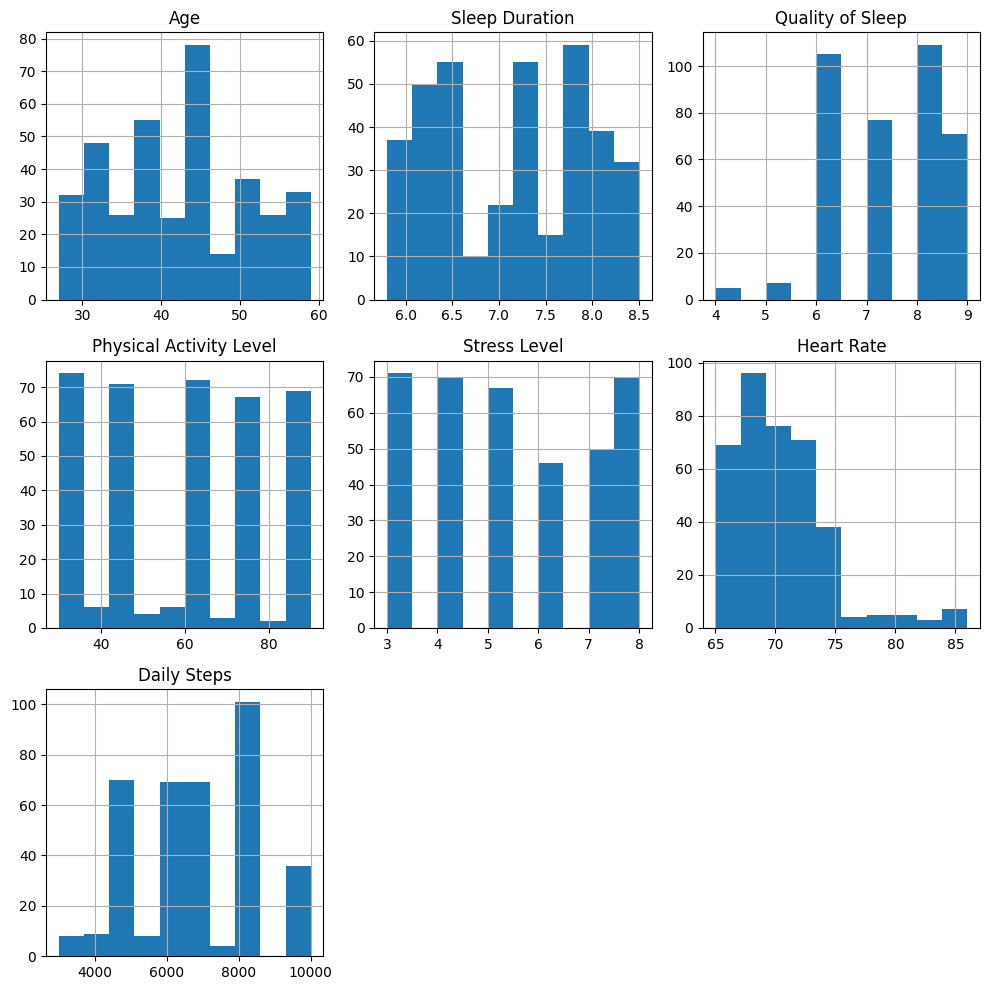

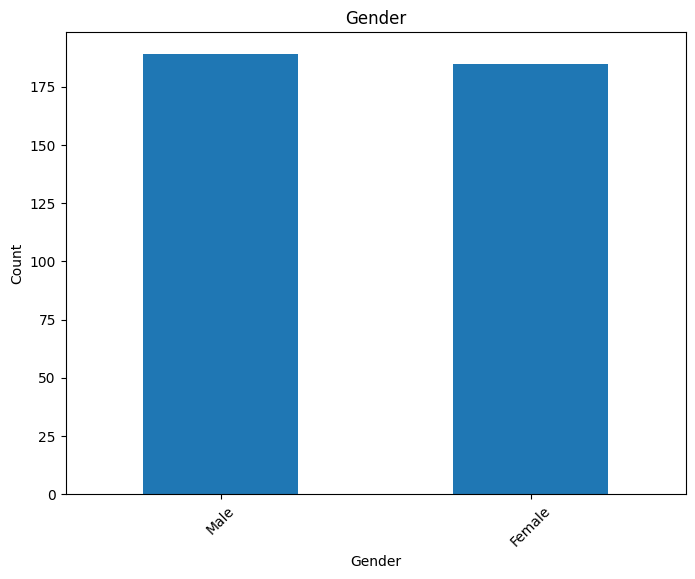

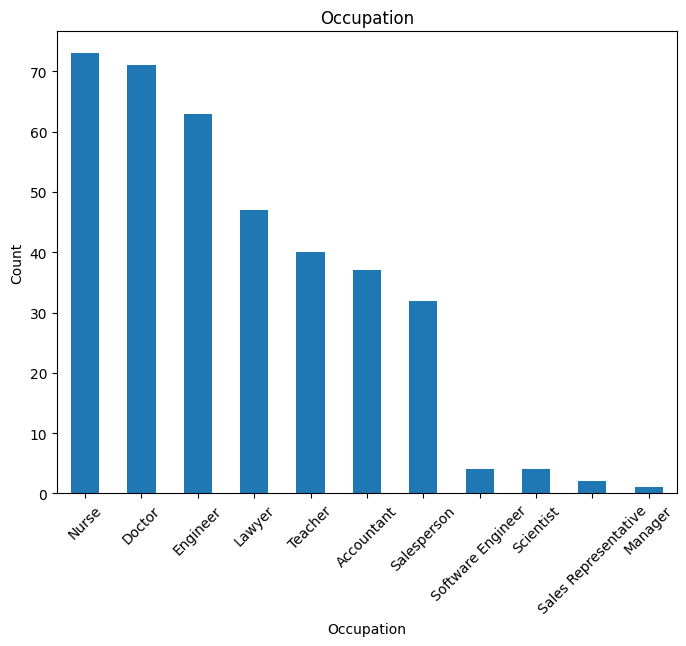

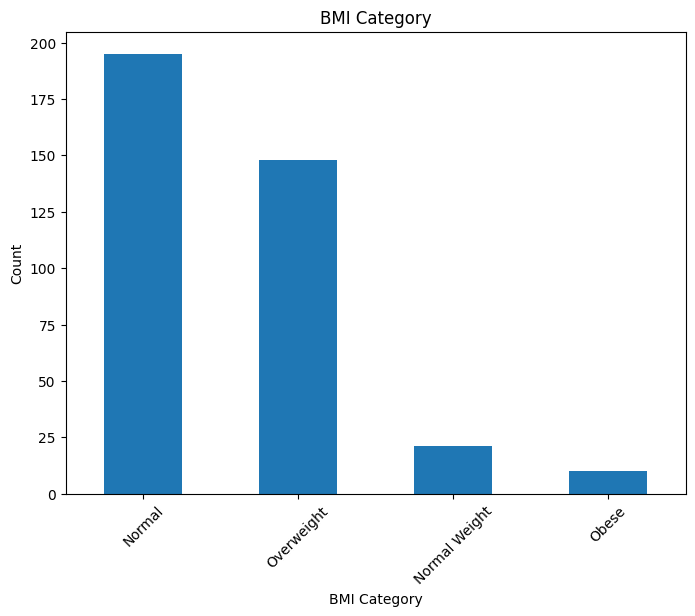

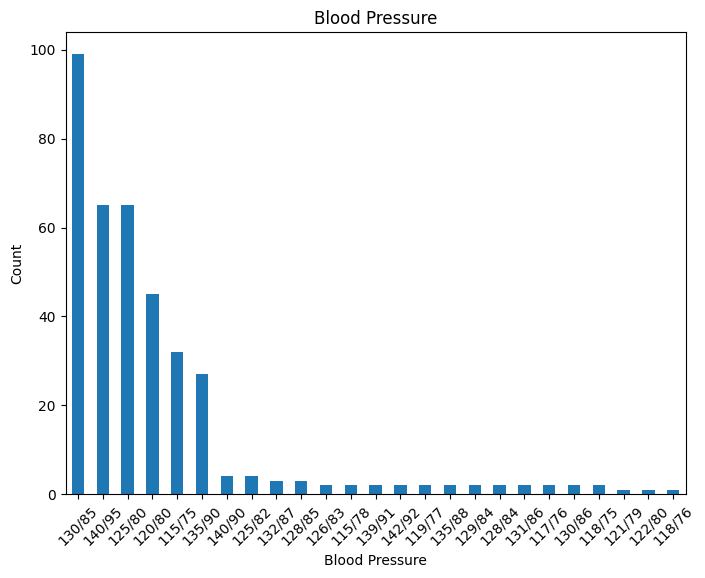

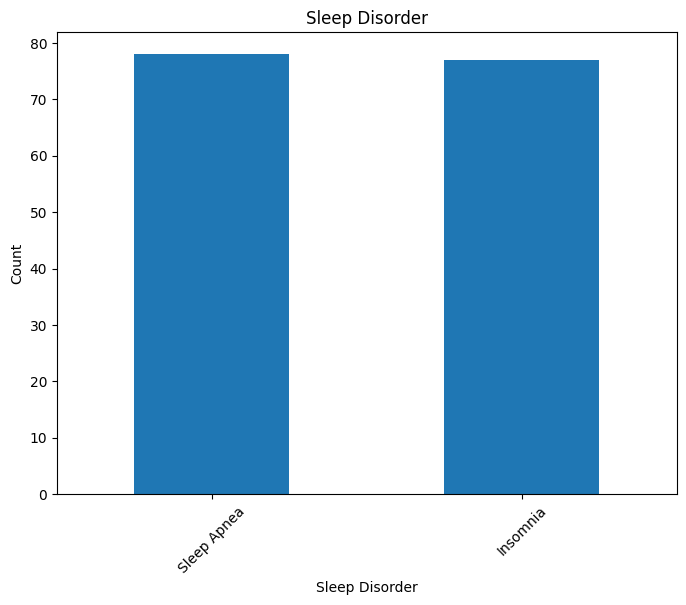

In [ ]:
# Afficher les premières lignes du dataframe pour comprendre sa structure
print(df.head())

# Statistiques descriptives
print(df.describe())

# Visualisation des distributions des variables numériques
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Visualisation des variables catégorielles
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

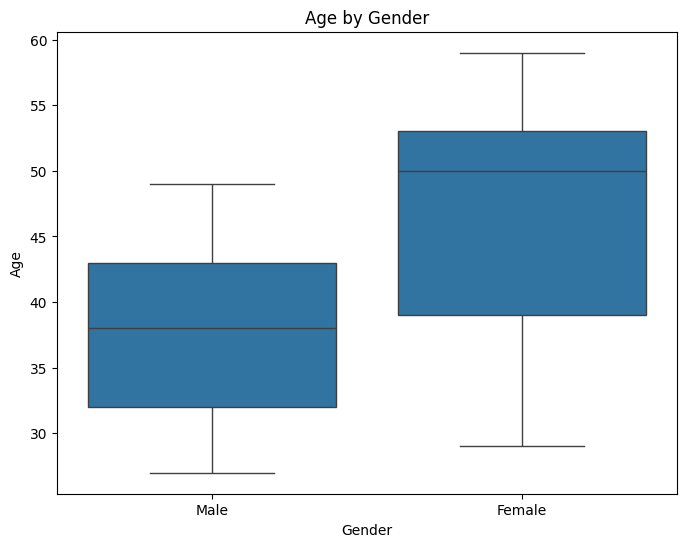

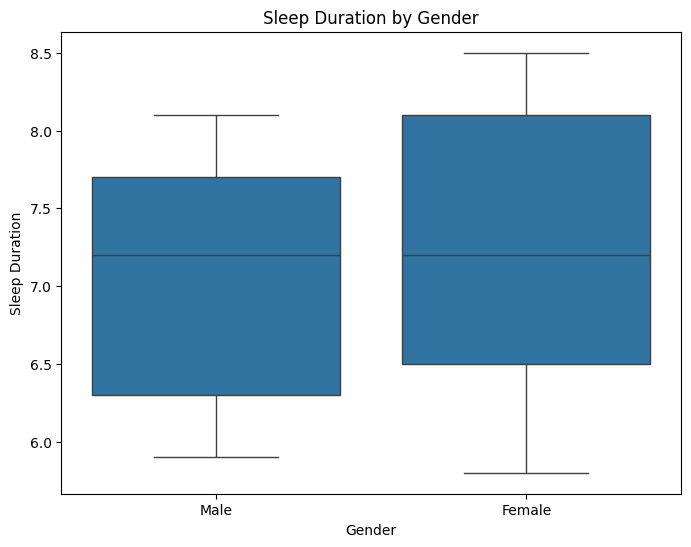

In [ ]:
# Variable qualitative intéressante
qualitative_variable = 'Gender'

# Liste des variables numériques à comparer
numeric_variables = ['Age', 'Sleep Duration']

# Créer des boxplots comparatifs pour chaque variable numérique en fonction de la variable qualitative
for variable in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=qualitative_variable, y=variable, data=df)
    plt.title(f'{variable} by {qualitative_variable}')
    plt.xlabel(qualitative_variable)
    plt.ylabel(variable)
    plt.show()


**2.Analyser la matrice de corrélations, diagonaliser la matrice, justifier le choix de la dimension du s.e.v. de projection.Projeter tous les individus sur le s.e.v. choisi ainsi que les variables**


In [ ]:
#séparation des données en varibles quantitatives et variables qualitatives
categorical_vars = df.select_dtypes(include=['object'])
numerical_vars = df.select_dtypes(include=['float64', 'int64'])

print(numerical_vars)

           Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
Person ID                                                                   
1           27             6.1                 6                       42   
2           28             6.2                 6                       60   
3           28             6.2                 6                       60   
4           28             5.9                 4                       30   
5           28             5.9                 4                       30   
...        ...             ...               ...                      ...   
370         59             8.1                 9                       75   
371         59             8.0                 9                       75   
372         59             8.1                 9                       75   
373         59             8.1                 9                       75   
374         59             8.1                 9                       75   

In [ ]:
#scikit-learn
import sklearn
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(numerical_vars)
print(Z)

[[-1.75309569 -1.29888693 -1.09828011 ...  0.34702051  1.6547187
  -1.61958404]
 [-1.63764266 -1.17303623 -1.09828011 ...  1.47559156  1.17047394
   1.97007745]
 [-1.63764266 -1.17303623 -1.09828011 ...  1.47559156  1.17047394
   1.97007745]
 ...
 [ 1.94140144  1.21812712  1.41143533 ... -1.34583606 -0.52438269
   0.11335599]
 [ 1.94140144  1.21812712  1.41143533 ... -1.34583606 -0.52438269
   0.11335599]
 [ 1.94140144  1.21812712  1.41143533 ... -1.34583606 -0.52438269
   0.11335599]]


In [ ]:
#la matrice de coorélation
Coor = numerical_vars.corr()

#affichage de la matrice de corrélation en pourcentage
print(Coor)

                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.178993     -0.422344   -0.225606   
Sleep Duration                          0.212360     -0.811023   -0.516455   
Quality of Sleep                        0.192896     -0.898752   -0.659865   
Physical Activity Level                 1.000000     -0.034134    0.136971   
Stress Level                           -0

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Coor)

diagonal_matrix = np.diag(eigenvalues)

#affichage des valeurs propres en ordre décroissant
print(diagonal_matrix)

[[3.48370838 0.         0.         0.         0.         0.
  0.        ]
 [0.         1.82328943 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.79495298 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.5956675  0.         0.
  0.        ]
 [0.         0.         0.         0.         0.1573186  0.
  0.        ]
 [0.         0.         0.         0.         0.         0.08862156
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05644155]]


In [ ]:
# Calcul du pourcentage de variance expliquée par chacun des axes factoriels
tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(pd.DataFrame({'valprop':eigenvalues,'inertie':var_exp,'inertiecum':cum_var_exp}))

# Create a DataFrame to store the results
var_exp_df = pd.DataFrame({'valprop': eigenvalues,
                            'inertie': var_exp,
                            'inertiecum': cum_var_exp})

    valprop    inertie  inertiecum
0  3.483708  49.767263   49.767263
1  1.823289  26.046992   75.814254
2  0.794953  11.356471   87.170726
3  0.595667   8.509536   95.680261
4  0.157319   2.247409   97.927670
5  0.088622   1.266022   99.193692
6  0.056442   0.806308  100.000000


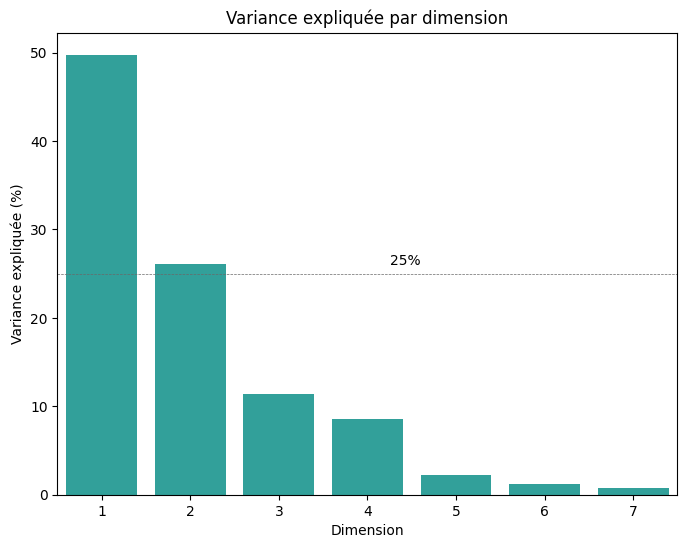

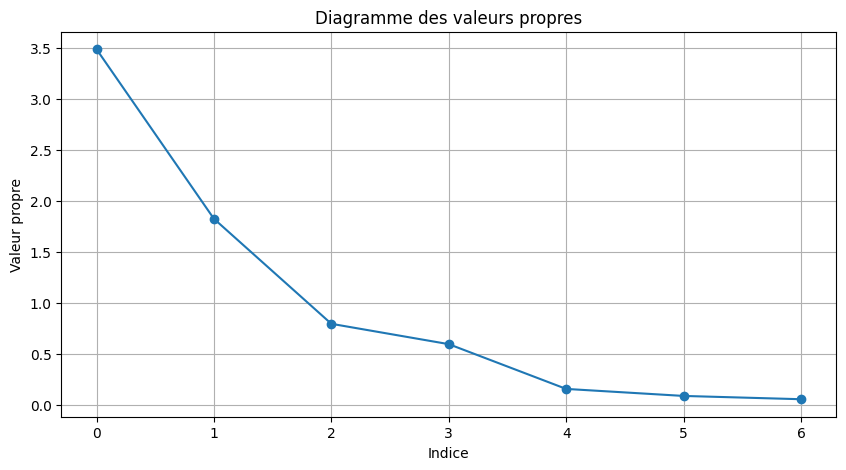

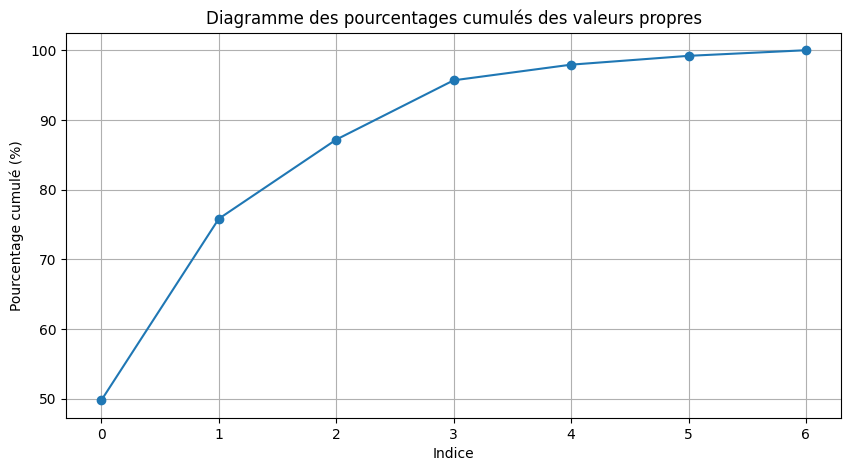

In [ ]:
# Plotting explained variance
plt.figure(figsize=(8, 6))
sns.barplot(x=var_exp_df.index + 1, y="inertie", color="lightseagreen", data=var_exp_df)
plt.title("Variance expliquée par dimension")
plt.xlabel("Dimension")
plt.ylabel("Variance expliquée (%)")
plt.axhline(y=25, linewidth=.5, color="dimgray", linestyle="--")
plt.text(3.25, 26, "25%")
plt.show()

# Diagramme des valeurs propres
plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, '-o')
plt.title('Diagramme des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Valeur propre')
plt.grid(True)
plt.show()

# Calcul des pourcentages cumulés
cumulative_percentages = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

# Diagramme des pourcentages cumulés
plt.figure(figsize=(10, 5))
plt.plot(cumulative_percentages, '-o')
plt.title('Diagramme des pourcentages cumulés des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Pourcentage cumulé (%)')
plt.grid(True)
plt.show()

Coordonnées des individus dans le nouveau repère (Tp) :
[[ 2.59907088  1.68600143]
 [ 2.81745197 -1.46841426]
 [ 2.81745197 -1.46841426]
 [ 4.93323542  2.23381385]
 [ 4.93323542  2.23381385]
 [ 4.93323542  2.23381385]
 [ 3.17896039  1.78940999]
 [ 0.27426666 -0.89367855]
 [ 0.27426666 -0.89367855]
 [ 0.27426666 -0.89367855]
 [ 2.48661671  0.52641298]
 [ 0.27426666 -0.89367855]
 [ 2.48661671  0.52641298]
 [ 2.54687002  0.52864897]
 [ 2.54687002  0.52864897]
 [ 2.54687002  0.52864897]
 [ 3.30278371  1.65600102]
 [ 2.54687002  0.52864897]
 [ 3.30278371  1.65600102]
 [ 0.36096005 -0.90313928]
 [ 0.30070674 -0.90537527]
 [ 0.30070674 -0.90537527]
 [ 0.30070674 -0.90537527]
 [ 0.30070674 -0.90537527]
 [ 0.24045343 -0.90761126]
 [ 0.18020012 -0.90984725]
 [ 0.24045343 -0.90761126]
 [ 0.18020012 -0.90984725]
 [ 0.18020012 -0.90984725]
 [ 0.18020012 -0.90984725]
 [ 3.15906125  1.83168022]
 [ 3.15906125  1.83168022]
 [-0.95263566 -0.2622064 ]
 [ 2.60399052  1.70686274]
 [ 0.26689351 -0.91930798]

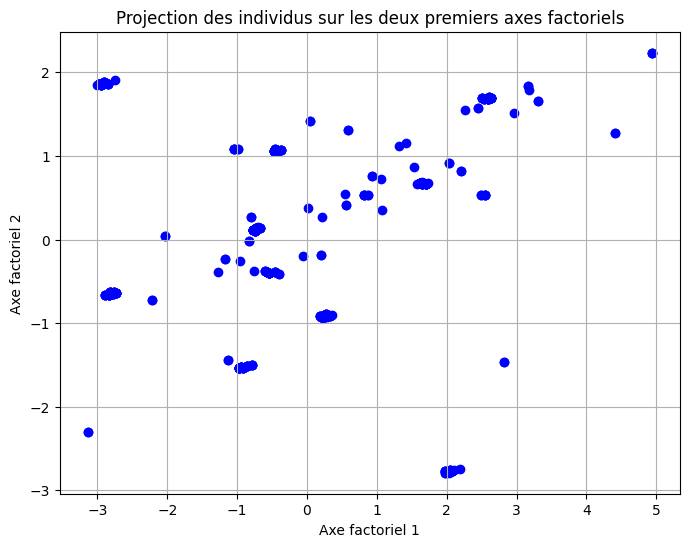

In [ ]:
#Projection des points de données sur les deux premières composantes principales
selected_eigenvectors = eigenvectors[:, :2]


Tp = np.dot(Z, selected_eigenvectors)


print("Coordonnées des individus dans le nouveau repère (Tp) :")
print(Tp)



plt.figure(figsize=(8, 6))
plt.scatter(Tp[:, 0], Tp[:, 1], color='blue')


plt.xlabel('Axe factoriel 1')
plt.ylabel('Axe factoriel 2')
plt.title('Projection des individus sur les deux premiers axes factoriels')
plt.grid(True)
plt.show()

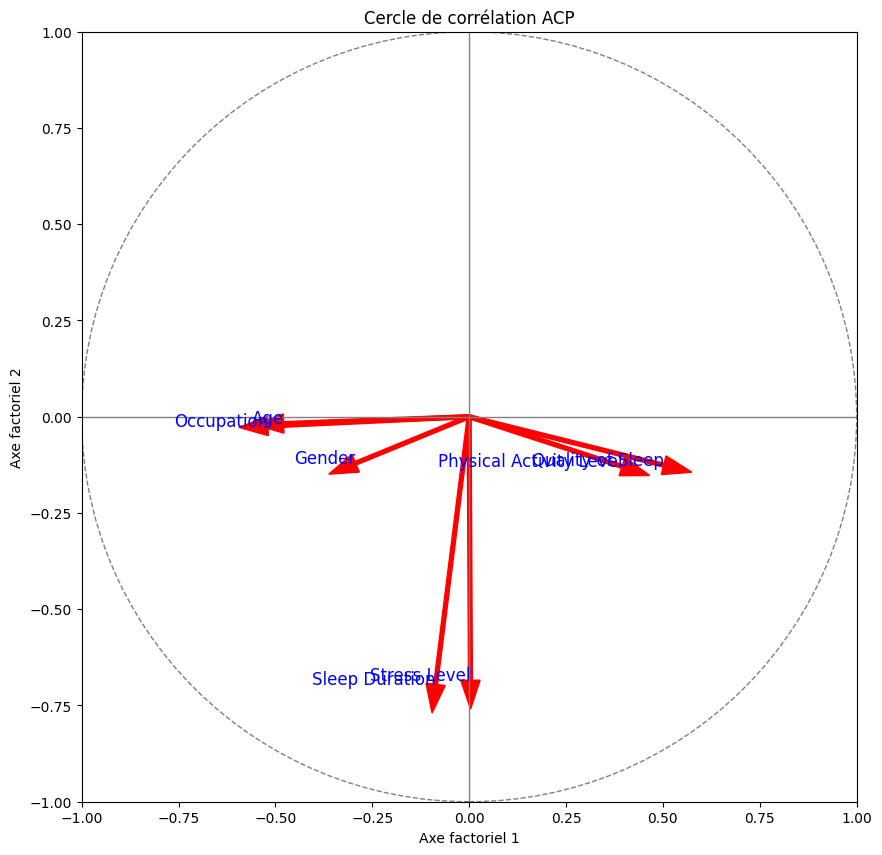

In [ ]:
#Cercle de corrélation ACP
# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(eigenvectors.shape[0]):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], color='red', width=0.01, head_width=0.05)
    plt.text(eigenvectors[i, 0], eigenvectors[i, 1], df.columns[i], color='blue', ha='right', fontsize=12)

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('Axe factoriel 1')
plt.ylabel('Axe factoriel 2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()

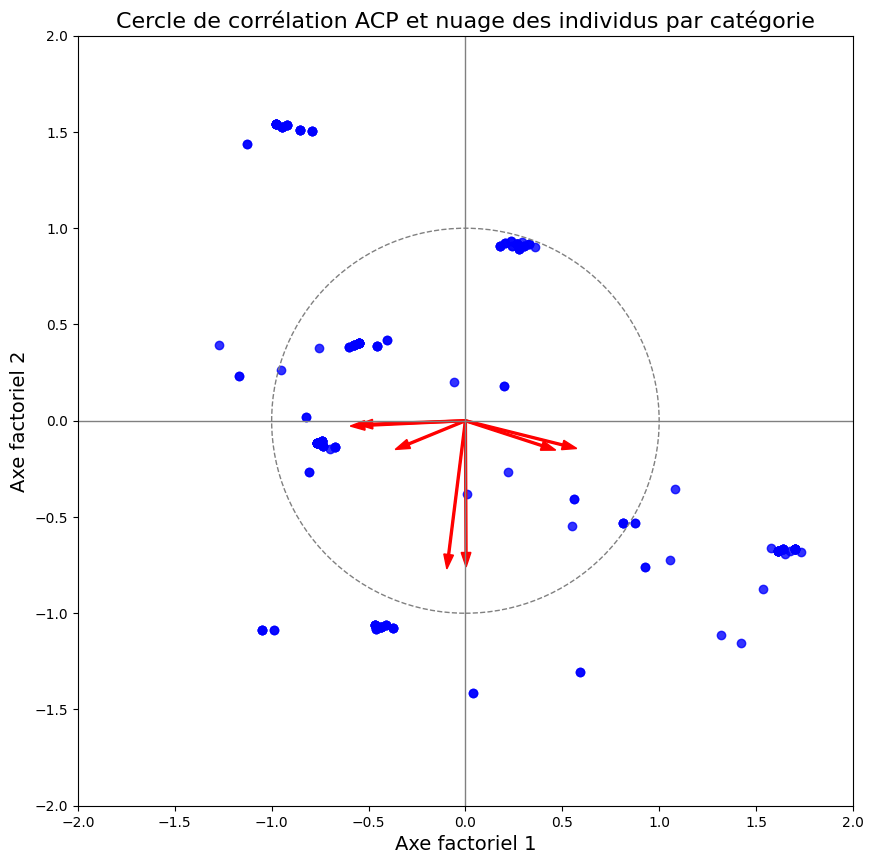

In [ ]:
#ACP avec cercle de corrélation et nuage des individus
W = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(W)


# Appliquer l'ACP
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(X_scaled)

# Créer la figure
plt.figure(figsize=(10, 10))

# Nuage des individus
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], color='blue', alpha=0.8)

# Placer les vecteurs des variables
for i in range(eigenvectors.shape[0]):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], color='red', width=0.01, head_width=0.05)
    if eigenvectors[i, 0] > 1 or eigenvectors[i, 0] < -1 or eigenvectors[i, 1] > 1 or eigenvectors[i, 1] < -1:
        plt.text(eigenvectors[i, 0], eigenvectors[i, 1], f'Variable {i+1}', color='blue', ha='right', fontsize=12)

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('Axe factoriel 1', fontsize=14)
plt.ylabel('Axe factoriel 2', fontsize=14)
plt.title('Cercle de corrélation ACP et nuage des individus par catégorie', fontsize=16)

# Afficher la figure
plt.show()

**3.Calculer les contributions et qualités de représentation des individus et variables en INTERPETANT les outputs et mettant en évidence toutes les informations pertinentes que vos données renferment**

In [ ]:
# Appliquer l'analyse des composantes principales (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print ("Contributions des individus aux composantes principales")
# Contributions des individus aux composantes principales
contribution_indiv = pca.explained_variance_ratio_
print (contribution_indiv)
print("Qualités de représentation des individus")
# Qualités de représentation des individus
qualité_indiv = np.sum(X_pca**2, axis=1)
print(qualité_indiv)

# Contributions des variables aux composantes principales
print("Contributions des variables aux composantes principales")
var_contributions = pca.components_.T * np.sqrt(pca.explained_variance_)
print(var_contributions)

# Qualités de représentation des variables
var_repr_qualities = np.sum((X_scaled @ pca.components_.T)**2, axis=0)

Contributions des individus aux composantes principales
[0.49767263 0.26046992 0.11356471 0.08509536 0.02247409 0.01266022
 0.00806308]
Qualités de représentation des individus
[12.12955586 12.69427906 12.69427906 35.39131469 35.39131469 35.39131469
 18.72381205  4.32932558  4.32932558  4.32932558  9.89191127  4.32932558
  9.89191127 10.23468133 10.23468133 10.23468133 17.08214981 10.23468133
 17.08214981  3.63137793  3.79543664  3.79543664  3.79543664  3.79543664
  3.99117216  4.21858447  3.99117216  4.21858447  4.21858447  4.21858447
 15.17729269 15.17729269  4.20142391 10.16608024  3.48394203 10.16608024
 10.16608024  3.31988331  3.31988331  3.31988331  3.48394203  3.48394203
  3.48394203  3.67967754  3.48394203  3.67967754  3.48394203  3.67967754
  3.48394203  3.48394203  4.74057484  4.74057484 10.2240145   3.03504751
 10.2240145  10.2240145   3.19910622 10.2240145  10.2240145   3.19910622
 10.2240145  10.2240145   9.57015117  9.57015117  9.57015117  9.57015117
  2.32295575  9.9658

**4. CAH, définir le nombre de classes retenues en spécifiant le critère utilisé dans la CAH**

In [ ]:
# Sélection des colonnes pour la CAH
X = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
print(X)
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

           Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
Person ID                                                                   
1           27             6.1                 6                       42   
2           28             6.2                 6                       60   
3           28             6.2                 6                       60   
4           28             5.9                 4                       30   
5           28             5.9                 4                       30   
...        ...             ...               ...                      ...   
370         59             8.1                 9                       75   
371         59             8.0                 9                       75   
372         59             8.1                 9                       75   
373         59             8.1                 9                       75   
374         59             8.1                 9                       75   

In [ ]:
# Spécifiez le nombre de classes retenues et utilisez le critère approprié
num_clusters = 3
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_scaled)

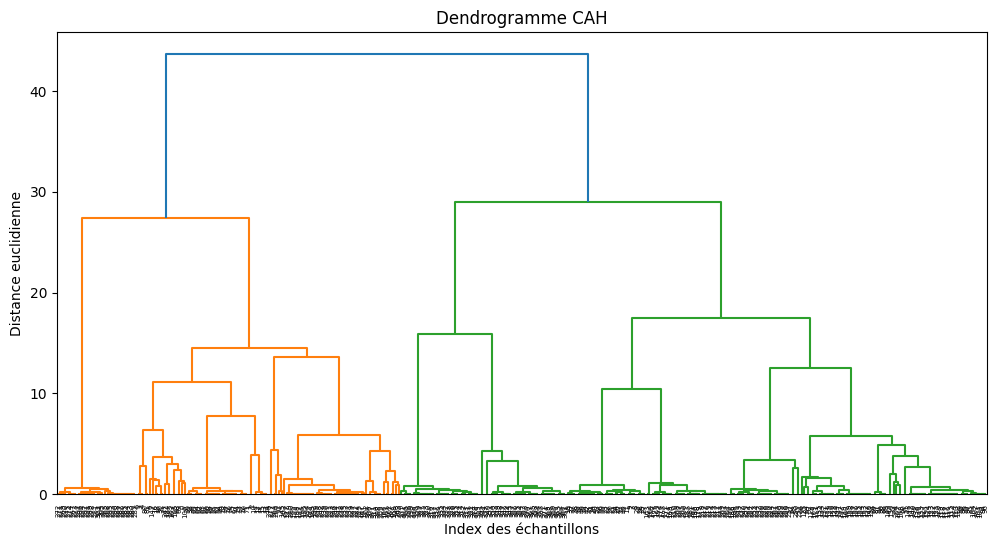

In [ ]:
# Calculez la matrice de liaison pour le dendrogramme
Z = linkage(X_scaled, method='ward')

# Tracez le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogramme CAH')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance euclidienne')
plt.show()

**5.Représenter graphiquement la partition obtenue suite à la classification sur les plans factoriels de projection**

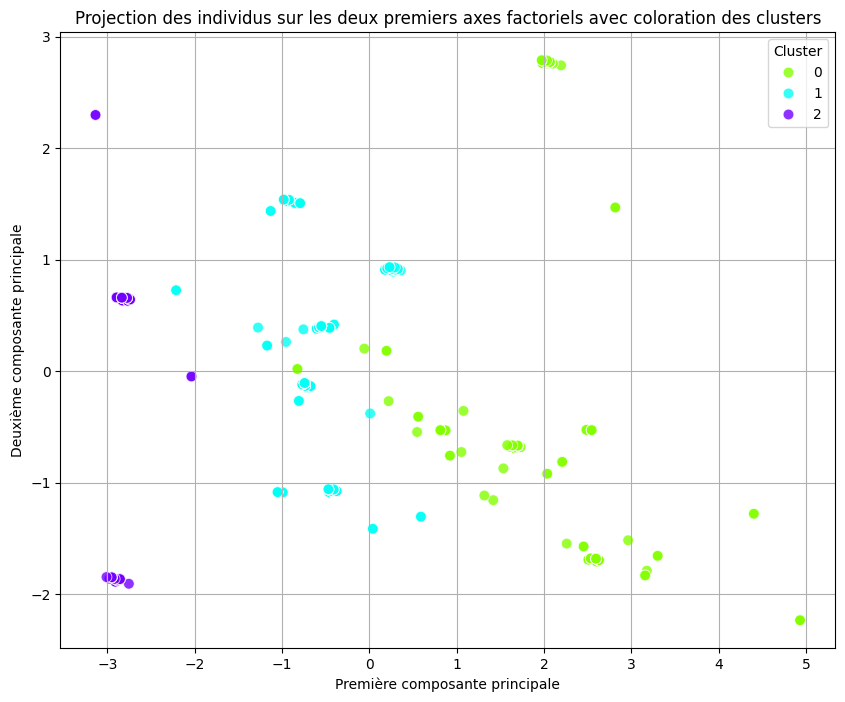

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Appliquer l'ACP sur les données normalisées
pca = PCA(n_components=2)  # Utiliser 2 composantes principales pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Créer la figure pour la visualisation
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour colorer les clusters
palette = sns.color_palette("hsv", len(set(cluster_labels)))  # Générer une palette de couleurs
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette=palette, s=60, alpha=0.8, legend='full')

# Ajouter les légendes et titres
plt.title('Projection des individus sur les deux premiers axes factoriels avec coloration des clusters')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Cluster')
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.show()


**6.Caractérisées les classes obtenues dans la CAH par rapport aux variables.
Appliquer la méthode k-means et comparer la partition obtenue avec la CAH**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre de clusters : 2, Score de silhouette : 0.39069666419132676
Nombre de clusters : 3, Score de silhouette : 0.40857960340992105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre de clusters : 4, Score de silhouette : 0.5030983402662346
Nombre de clusters : 5, Score de silhouette : 0.4712754295865384


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre de clusters : 6, Score de silhouette : 0.5340924069400939
Nombre de clusters : 7, Score de silhouette : 0.5388525278406446
Nombre de clusters : 8, Score de silhouette : 0.5760645973384867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre de clusters : 9, Score de silhouette : 0.5904909156730367
Nombre de clusters : 10, Score de silhouette : 0.6226482246693148


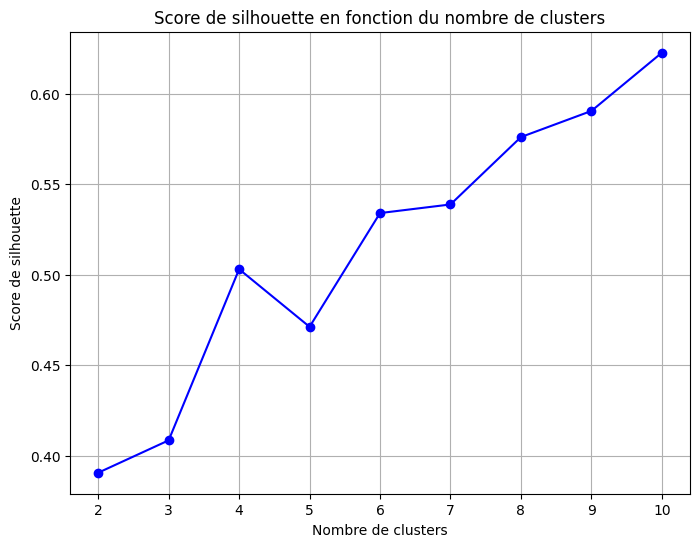

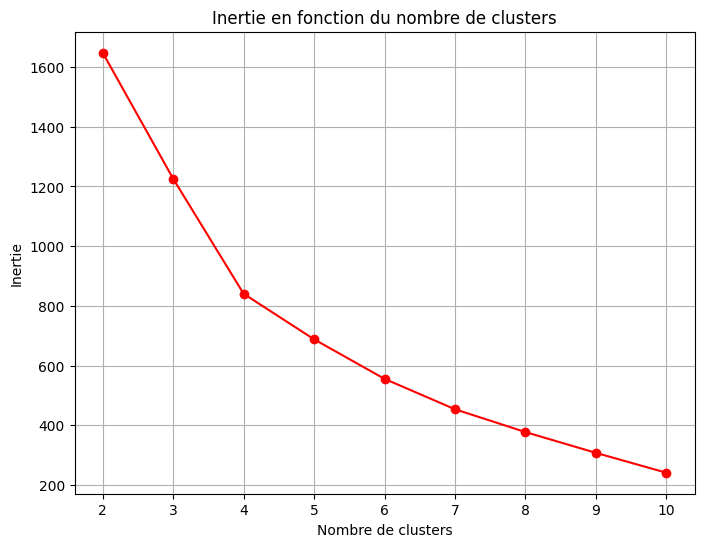

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Créer une liste pour stocker les scores de silhouette
silhouette_scores = []

# Créer une liste pour stocker les labels de clusters
kmeans_labels = []

# Créer une liste pour stocker les modèles KMeans
kmeans_models = []

# Créer une liste pour stocker les inerties
inertias = []

# Créer une liste pour stocker les nombres de clusters
num_clusters = list(range(2, 11))

# Appliquer KMeans pour chaque nombre de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_labels.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    kmeans_models.append(kmeans)
    inertias.append(kmeans.inertia_)
    print(f"Nombre de clusters : {k}, Score de silhouette : {silhouette_scores[-1]}")

# Tracer le score de silhouette en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, silhouette_scores, '-o', color='blue')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.grid(True)
plt.show()

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertias, '-o', color='red')
plt.title('Inertie en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

**7.Le taux de bon classement par la CAH ou k-means et COMPARER!**

In [ ]:
from sklearn.metrics import adjusted_rand_score

cluster_labels_kmeans = kmeans.labels_
true_labels = df['Gender']

# Calculez l'indice de Rand ajusté pour la CAH
ari_cah = adjusted_rand_score(true_labels, cluster_labels)

# Calculez l'indice de Rand ajusté pour K-Means
ari_kmeans = adjusted_rand_score(true_labels, cluster_labels_kmeans)

# Affichez les résultats
print("Indice de Rand ajusté pour CAH:", ari_cah)
print("Indice de Rand ajusté pour K-Means:", ari_kmeans)


Indice de Rand ajusté pour CAH: 0.09871249483891775
Indice de Rand ajusté pour K-Means: 0.1337282230001895
